In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score 
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("spam.csv",encoding="latin1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Claeaning

In [4]:
data.shape

(5572, 5)

In [5]:
data.duplicated().sum()

np.int64(403)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(5169, 5)

In [8]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [9]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [13]:
data.sample(5)

,target,text
1751,ham,* Was thinking about chuckin ur red green n bl...
2406,ham,One of best dialogue in cute reltnship..!! \We...
4493,ham,Man this bus is so so so slow. I think you're ...
1791,ham,U havenåÕt lost me ill always b here 4u.i didn...
3299,ham,Just do what ever is easier for you


In [14]:
from sklearn.preprocessing import LabelEncoder


In [15]:
le=LabelEncoder()

In [16]:
data["target"]=le.fit_transform(data["target"])       #     ham=0 and spam=1

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


# Exploratiory Data Analysis(EDA)

In [18]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
data["target"].value_counts()    # As 0 is much more then then 1 so it is Unbalnced dataset

target
0    4516
1     653
Name: count, dtype: int64

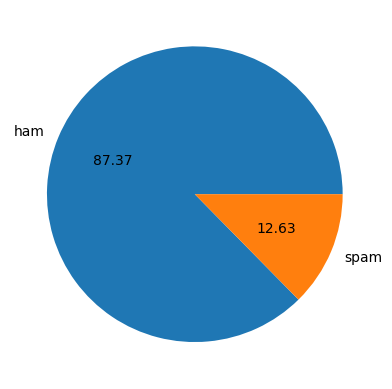

In [20]:
plt.pie(data["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [21]:
import nltk
nltk.download('punkt_tab')

In [22]:
nltk.download('punkt', download_dir='C:\\Users\\hasee/nltk_data')

[nltk_data] Downloading package punkt to C:\Users\hasee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# data["text"].apply(lambda x:len(x))
data["num_characters"]=data["text"].apply(len)

In [23]:
data["num_words"]=data["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
data["sentence"]=data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
data.head()

,target,text,num_characters,num_words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
data.rename(columns={"sentence":"num_sentences"},inplace=True)

In [28]:
data[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


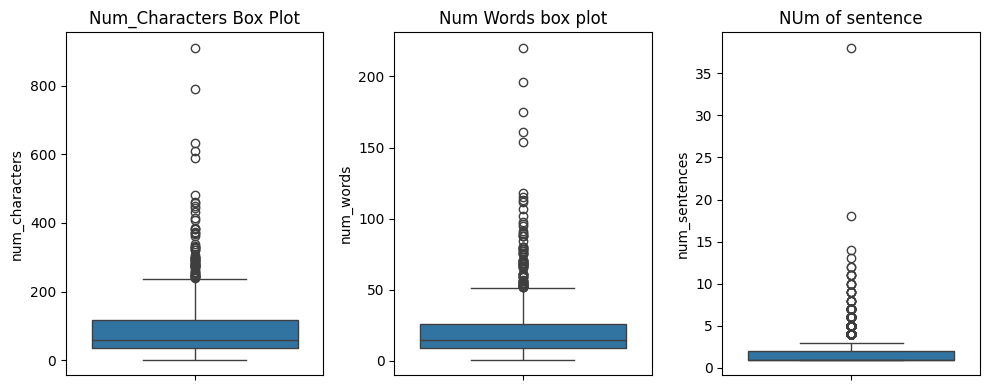

In [29]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(10,4))

sns.boxplot(data["num_characters"],ax=ax1)
ax1.set_title("Num_Characters Box Plot")

sns.boxplot(data["num_words"],ax=ax2)
ax2.set_title("Num Words box plot")

sns.boxplot(data["num_sentences"],ax=ax3)
ax3.set_title("NUm of sentence")

plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

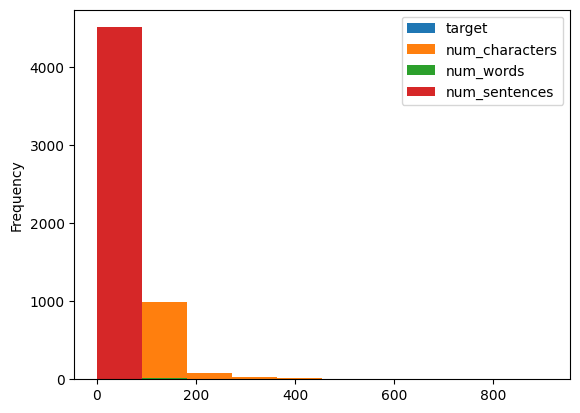

In [30]:
data[data["target"]==0].plot(kind="hist")   

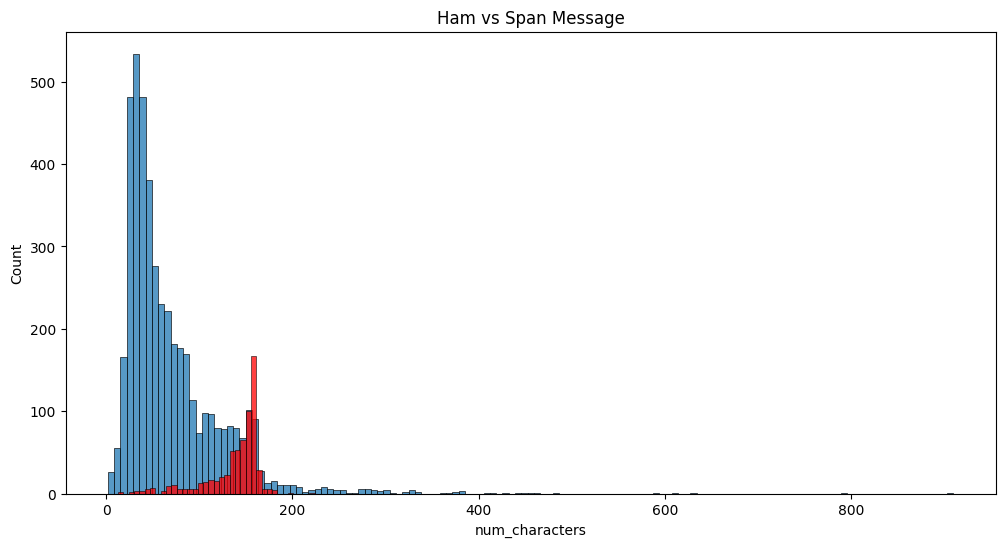

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(data[data["target"]==0]["num_characters"])   #ham
sns.histplot(data[data["target"]==1]["num_characters"],color="red") #spam
plt.title("Ham vs Span Message")
plt.show()

[]

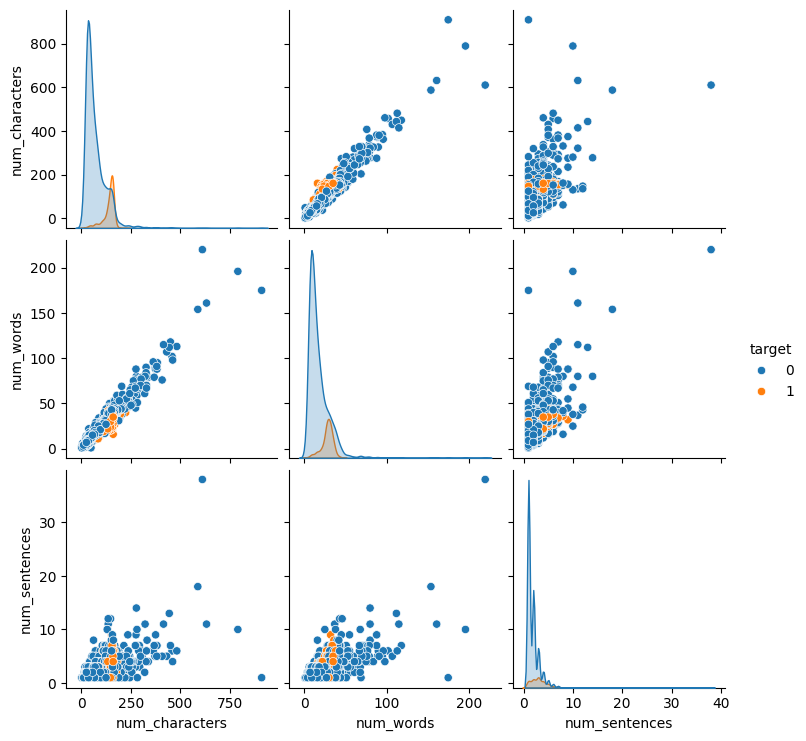

In [32]:
sns.pairplot(data,hue="target")
plt.plot()

In [33]:
data.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [34]:
data[['target', 'num_characters', 'num_words', 'num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


Text(0.5, 1.0, 'Heat map')

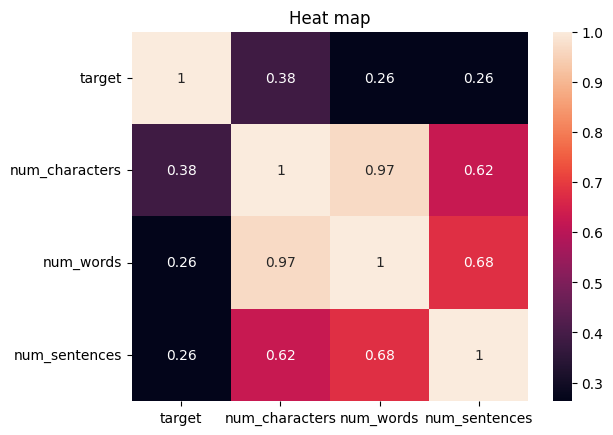

In [35]:
sns.heatmap(data[['target', 'num_characters', 'num_words', 'num_sentences']].corr(),annot=True)
plt.title("Heat map")

# Data Preprocessing

``Step 1``: Lowercase \
``Step 2``: Tokenization \
``Step 3``: Removing Special Characters \
``Step 4``: Removing Stop Words and Punctuation \
``Step 5``: Stemming 

In [41]:
def lowercase(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    l=[]
    for i in text:
        if i.isalnum():
            l.append(i)
    text=l[:]
    l.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            l.append(i)
    text=l[:]
    l.clear()
    for i in text:
        ps.stem(i)
        l.append(i)
    return " ".join(l)

In [42]:
lowercase("hello HOW R U @! dance dancing dances is are am hitler helicopter ali animals >")

'hello r u dance dancing dances hitler helicopter ali animals'

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")

'danc'

In [43]:
data['transformed_text']=data["text"].apply(lowercase)

In [44]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [45]:
from wordcloud import WordCloud

In [46]:
wc=WordCloud(width=500,height=500,background_color='black',min_font_size=11)

In [47]:
wc_text=wc.generate(data[data["target"]==1]["transformed_text"].str.cat(sep=" "))

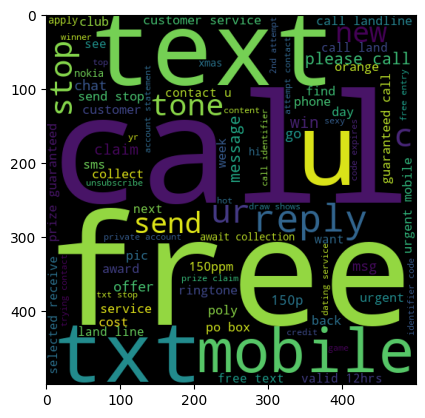

In [48]:
plt.imshow(wc_text)

In [49]:
ham_words=wc.generate(data[data["target"]==0]["transformed_text"].str.cat(sep=" "))

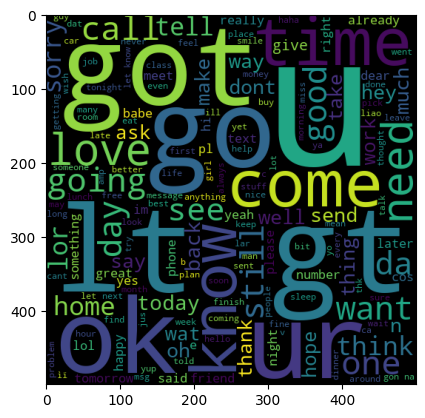

In [50]:
plt.imshow(ham_words)

In [51]:
msg_box=[]
for msg in data[data["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        msg_box.append(word)
        

In [52]:
from collections import Counter

In [53]:
most_common=Counter(msg_box).most_common(30)
df=pd.DataFrame(most_common, columns=['Item', 'Count'])
df.head()

,Item,Count
0,call,302
1,free,191
2,2,155
3,txt,130
4,u,119


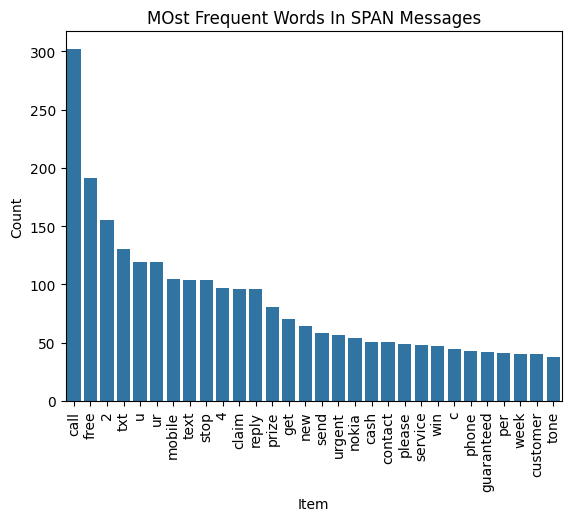

In [54]:
sns.barplot(data=df,x="Item",y="Count")
plt.xticks(rotation=90)
plt.title("MOst Frequent Words In SPAN Messages")
plt.show()

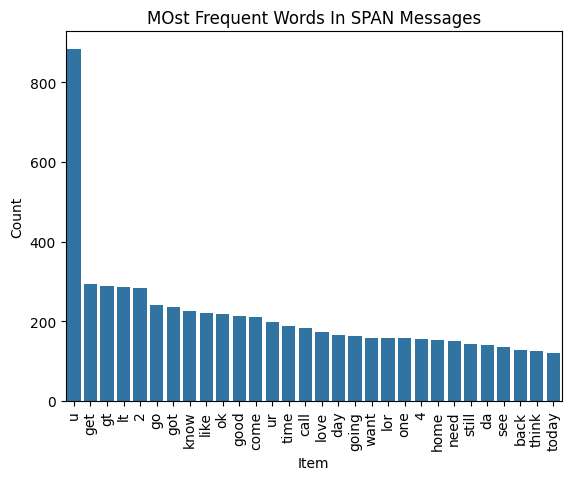

In [55]:
msg_box=[]
for msg in data[data["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        msg_box.append(word)
        

most_common=Counter(msg_box).most_common(30)
df=pd.DataFrame(most_common, columns=['Item', 'Count'])
df.head()

sns.barplot(data=df,x="Item",y="Count")
plt.xticks(rotation=90)
plt.title("MOst Frequent Words In SPAN Messages")
plt.show()

In [59]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


# Building Machine Learning Mdoel

In [144]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [145]:
cv=CountVectorizer()
tf=TfidfVectorizer()

In [146]:
x=tf.fit_transform(data["transformed_text"]).toarray()

In [147]:
y=data["target"].values

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [150]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [151]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [152]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("accuracy score is :",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("precision score is ",precision_score(y_test,y_pred))

accuracy score is : 0.8762088974854932
[[789 100]
 [ 28 117]]
precision score is  0.5391705069124424


In [153]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
print("accuracy score is :",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("precision score is ",precision_score(y_test,y_pred))

accuracy score is : 0.960348162475822
[[889   0]
 [ 41 104]]
precision score is  1.0


In [154]:
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
print("accuracy score is :",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("precision score is ",precision_score(y_test,y_pred))

accuracy score is : 0.9642166344294004
[[886   3]
 [ 34 111]]
precision score is  0.9736842105263158


# Ensemble learning(STACKING)

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
estaimator=[("lr",LogisticRegression()),
            ("dt",DecisionTreeClassifier()),
            ("knn",KNeighborsClassifier())
           ]

In [ ]:
from sklearn.ensemble import StackingClassifier

In [119]:
cls=StackingClassifier(estimators=estaimator,final_estimator=MultinomialNB(),cv=3,verbose=1,n_jobs=-1)

In [120]:
cls.fit(x_train,y_train)

StackingClassifier(cv=3,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=MultinomialNB(), n_jobs=-1, verbose=1)

In [ ]:
y_pred=cls.predict(x_test)
print("accuracy score is :",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("precision score is ",precision_score(y_test,y_pred))

# Voting Classifier

In [125]:
from sklearn.ensemble import VotingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC

In [128]:
svm=SVC(kernel="sigmoid",probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=80,random_state=2)

In [131]:
voting=VotingClassifier(estimators=[("svm",svm),("mnb",mnb),("etc",etc)],voting="soft")
voting

VotingClassifier(estimators=[('svm', SVC(kernel='sigmoid', probability=True)),
                             ('mnb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=80,
                                                   random_state=2))],
                 voting='soft')

In [132]:
voting.fit(x_train,y_train)
y_pred=voting.predict(x_test)
print("accuracy score is :",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("precision score is ",precision_score(y_test,y_pred))

accuracy score is : 0.9796905222437138
[[888   1]
 [ 20 125]]
precision score is  0.9920634920634921


# PipeLIne

In [156]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([("tf",tf),("MNB",MultinomialNB())])
pipe

Pipeline(steps=[('tf', TfidfVectorizer()), ('MNB', MultinomialNB())])

In [159]:
import pickle
pickle.dump(tf,open("vector.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))